### 使用箱型图检测异常值
可以这样理解：
假设有一个数据集，有10万条数据，先将数据按从小到大的顺序排序

那么，前5万条数据的中位数就是Q3，后5万条数据的中位数就是Q1，四分位数间距IQR就是Q3-Q1。

异常值范围通常为小于Q1-1.5IQR，或者大于Q3+1.5IQR

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [32]:
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
df = pd.DataFrame(X, columns=dataset.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
def box_outliers(ser):

    Q1 = ser.quantile(q=0.25)
    Q3 = ser.quantile(q=0.75)
    # 异常值范围通常为小于Q1-1.5IQR，或者大于Q3+1.5IQR
    lb = Q1-1.5*(Q3-Q1)
    ub = Q3+1.5*(Q3-Q1)
    rule = (lb>ser) | (ub<ser)
    
    index = np.arange(ser.shape[0])[rule]
    outliers=ser.iloc[index]
    
    return outliers

def plot():
    plt.figure(figsize=(10, 8), dpi=80)
    plt.rcParams["font.sans-serif"] = ["SimHei"]
    plt.rcParams["axes.unicode_minus"] = False

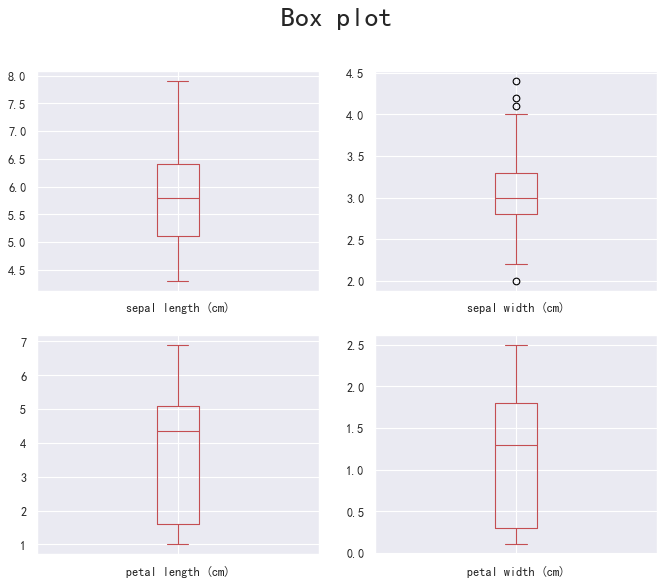

In [34]:
cnt = 0
plot()
for i in df.columns:
    cnt+=1
    plt.subplot(2, 2, cnt)
    out = box_outliers(df[i])
    df.boxplot(column=i, whis=1.5, color='r')
plt.suptitle('Box plot', fontsize=25)
plt.show()